# Қажетті пакеттерді орнату және деректерді жүктеу

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
%matplotlib inline

In [122]:
train_csv = pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')

In [124]:
titanic = pd.concat([train_csv, test_csv], ignore_index=True).drop_duplicates()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Деректерді өңдеу және тазалау

In [128]:
not_a_num = titanic.isnull()
not_a_num

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,True,False,False,False,True,False,False,False,False,True,False
1305,False,True,False,False,False,False,False,False,False,False,False,False
1306,False,True,False,False,False,False,False,False,False,False,True,False
1307,False,True,False,False,False,True,False,False,False,False,True,False


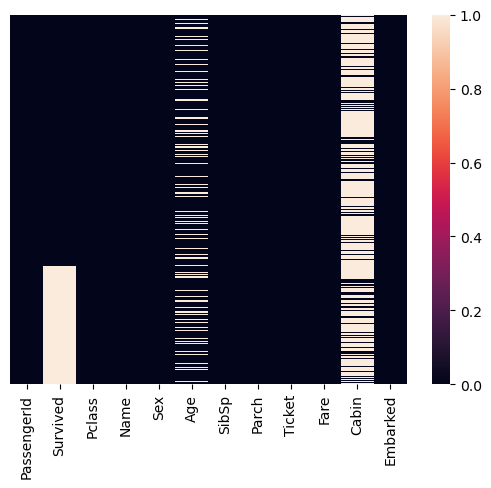

In [130]:
sns.heatmap(data=not_a_num, yticklabels=False, cmap='rocket')
plt.show()

In [132]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [134]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

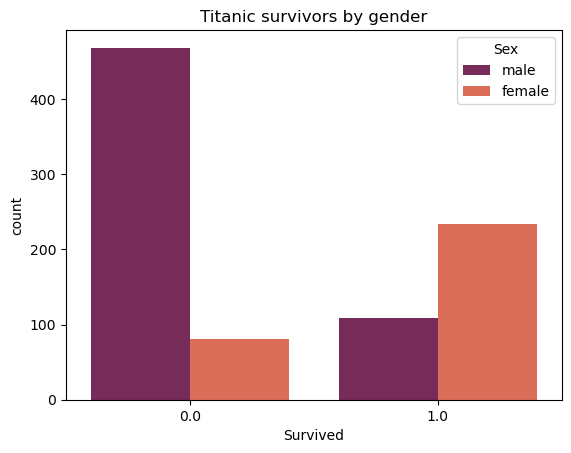

In [136]:
sns.countplot(titanic, x='Survived', hue='Sex', palette='rocket')
plt.title('Titanic survivors by gender')
plt.show()

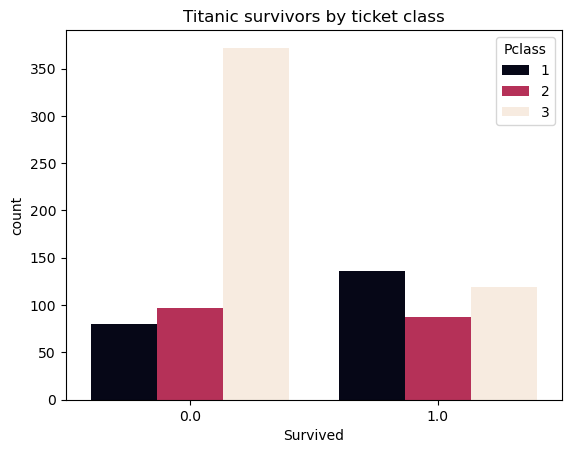

In [140]:
sns.countplot(titanic, x='Survived', hue='Pclass', palette='rocket')
plt.title('Titanic survivors by ticket class')
plt.show()

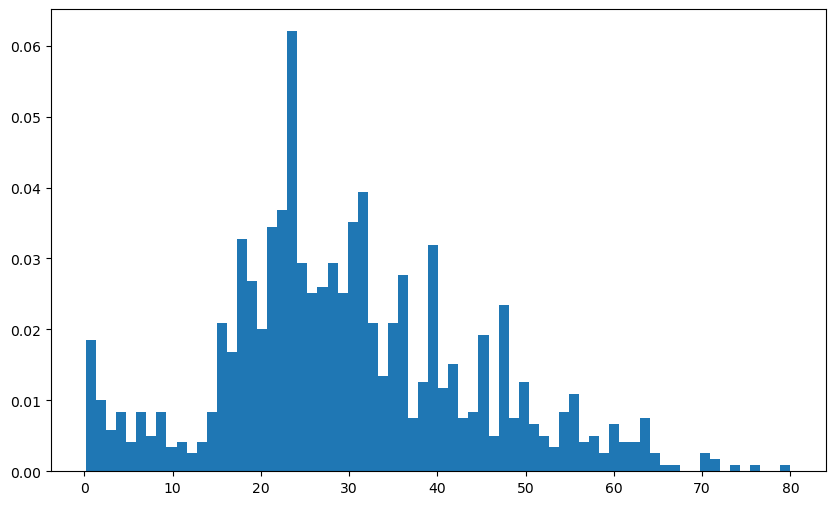

In [142]:
plt.figure(figsize=(10,6))
plt.hist(titanic['Age'].dropna(), bins=70, density=True)
plt.show()

In [144]:
first_class = titanic[titanic['Pclass'] == 1]
first_class

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1.0,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1295,NaN,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S
1295,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
1302,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


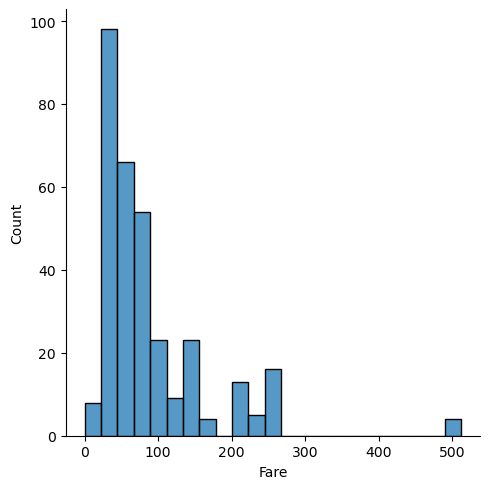

In [146]:
sns.displot(first_class, x='Fare', kind='hist')
plt.show()

In [148]:
titanic.dropna(subset=['Survived'], inplace=True)

In [150]:
#titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean()).apply(np.floor)
titanic['Age'] = titanic.apply(
    lambda x: np.floor(x['Age']) if not pd.isna(x['Age']) 
    else np.floor(titanic.groupby('Pclass')['Age'].transform('mean')[x.name]), 
    axis=1
)
titanic['Sex'] = titanic['Sex'].apply(lambda x: 0 if x == 'male' else 1 if x == 'female' else 2)
titanic['Embarked'] = titanic['Embarked'].apply(lambda x: 0 if x == 'S' else 1 if x == 'C' else 2 if x == 'Q' else 3)

In [152]:
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [162]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Деректер дайын

In [166]:
X.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,2,0,27.0,0,0,13.00,0
887,1,1,19.0,0,0,30.00,0
888,3,1,25.0,1,2,23.45,0
889,1,0,26.0,0,0,30.00,1
890,3,0,32.0,0,0,7.75,2


# Логистик регрессия модельді оқыту және тексеру

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=77)

In [179]:
log_reg_model = LogisticRegression(max_iter=200)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [181]:
predicts = log_reg_model.predict(X_test)

In [191]:
report = classification_report(y_test, predicts)
print(report)

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       225
         1.0       0.76      0.67      0.71       132

    accuracy                           0.80       357
   macro avg       0.79      0.77      0.78       357
weighted avg       0.80      0.80      0.80       357



In [196]:
cm = confusion_matrix(y_test, predicts)
cm

array([[197,  28],
       [ 44,  88]], dtype=int64)

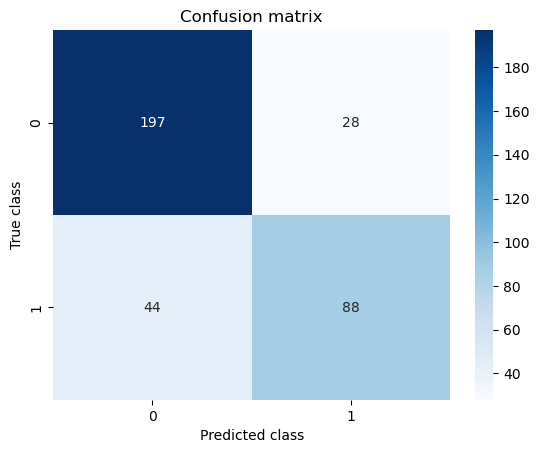

In [198]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Confusion matrix")
plt.show()